In [734]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler 

# Load the dataset 
data = pd.read_csv('Liver_Data.csv', encoding='ISO-8859-1')

# Display the first few rows of dataset
data.head()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
0,65.0,Female,0.7,0.1,187.0,16.0,18.0,6.8,3.3,0.90,1
1,62.0,Male,10.9,5.5,699.0,64.0,100.0,7.5,3.2,0.74,1
2,62.0,Male,7.3,4.1,490.0,60.0,68.0,7.0,3.3,0.89,1
3,58.0,Male,1.0,0.4,182.0,14.0,20.0,6.8,3.4,1.00,1
4,72.0,Male,3.9,2.0,195.0,27.0,59.0,7.3,2.4,0.40,1


In [644]:
# Check for missing values in the dataset
missing_values = data.isnull().sum()

# Display the missing values per column
print("Missing values per column:")
print(missing_values)

Missing values per column:
Age of the patient                        2
Gender of the patient                   902
Total Bilirubin                         648
Direct Bilirubin                        561
 Alkphos Alkaline Phosphotase           796
 Sgpt Alamine Aminotransferase          538
Sgot Aspartate Aminotransferase         462
Total Protiens                          463
 ALB Albumin                            494
A/G Ratio Albumin and Globulin Ratio    559
Result                                    0
dtype: int64


In [646]:
# Display the number of rows before cleaning
print(f"Number of rows before cleaning: {data.shape[0]}")

# Drop rows with missing values in any column
data = data.dropna()

# Display the number of rows after cleaning
print(f"Number of rows after cleaning: {data.shape[0]}")


Number of rows before cleaning: 30691
Number of rows after cleaning: 27158


In [648]:
# Check data types of each column
data_types = data.dtypes
print("\nData Types:\n", data_types)


Data Types:
 Age of the patient                      float64
Gender of the patient                    object
Total Bilirubin                         float64
Direct Bilirubin                        float64
 Alkphos Alkaline Phosphotase           float64
 Sgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
 ALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object


In [650]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Convert 'Gender of the patient' to binary (0 Female and 1 Male)
data['Gender of the patient'] = label_encoder.fit_transform(data['Gender of the patient'])
data_types = data.dtypes
print("\nData Types after encoding:\n", data_types)



Data Types after encoding:
 Age of the patient                      float64
Gender of the patient                     int32
Total Bilirubin                         float64
Direct Bilirubin                        float64
 Alkphos Alkaline Phosphotase           float64
 Sgpt Alamine Aminotransferase          float64
Sgot Aspartate Aminotransferase         float64
Total Protiens                          float64
 ALB Albumin                            float64
A/G Ratio Albumin and Globulin Ratio    float64
Result                                    int64
dtype: object


In [652]:
# Print the number of rows before dropping duplicates
print(f"Number of rows before: {data.shape[0]}")

# Drop duplicates
data = data.drop_duplicates()

# Print the number of rows after dropping duplicates
print(f"Number of rows after: {data.shape[0]}")

Number of rows before: 27158
Number of rows after: 16389


In [654]:
# #Identify outliers using the IQR method

# # Calculate IQR for each numeric column
# Q1 = data.quantile(0.25)
# Q3 = data.quantile(0.75)
# IQR = Q3 - Q1

# #Define the bounds for outliers
# lower_bound = Q1 - 1.5 * IQR
# upper_bound = Q3 + 1.5 * IQR

# #Print the number of rows before removing outliers
# print(f"Number of rows before removing outliers: {data.shape[0]}")

# #Remove rows that contain outliers and update
# data = data[~((data < lower_bound) | (data > upper_bound)).any(axis=1)]

# #Print the number of rows after removing outliers
# print(f"Number of rows after removing outliers: {data.shape[0]}")

In [656]:
# Check the data again after preprocessing
print("\nData after preprocessing:")
print(data.shape)


Data after preprocessing:
(16389, 11)


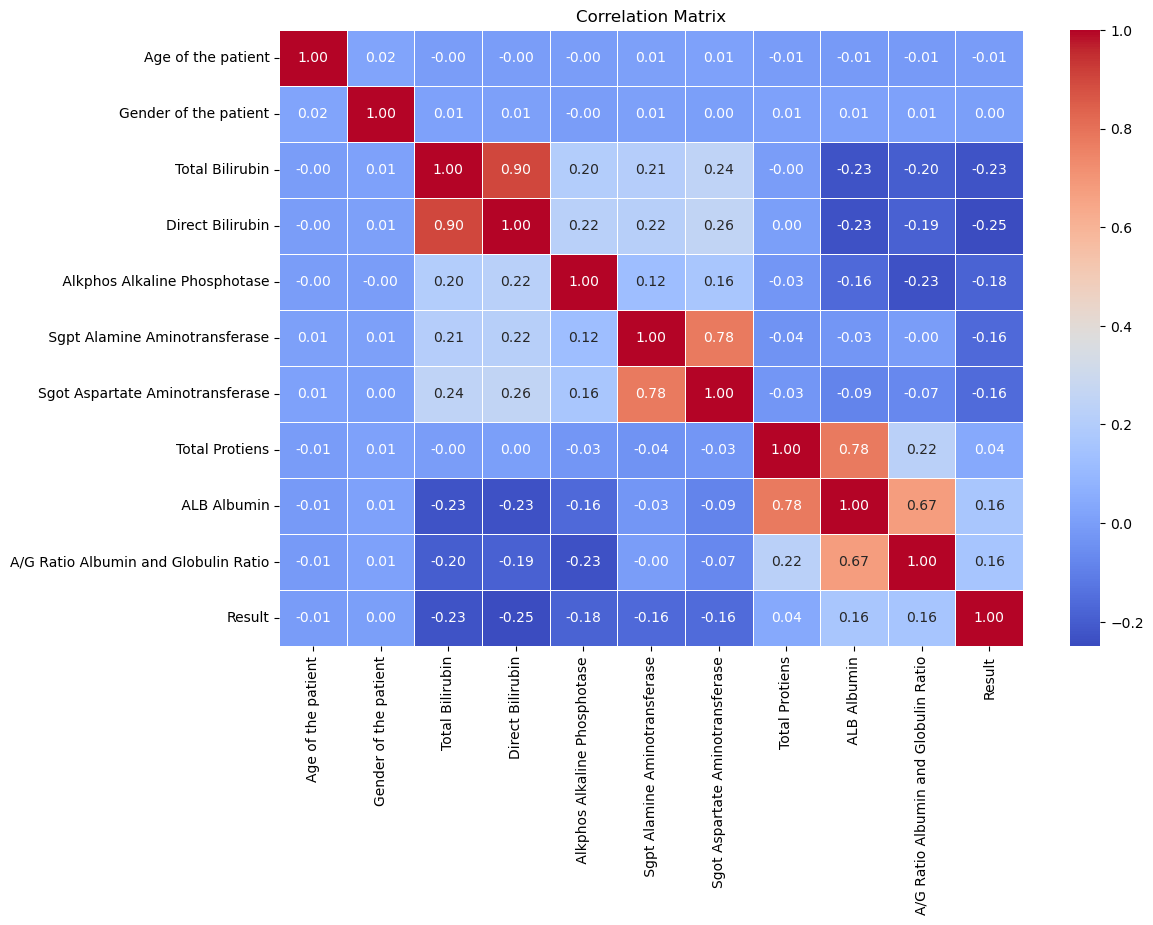

In [658]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Plot the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

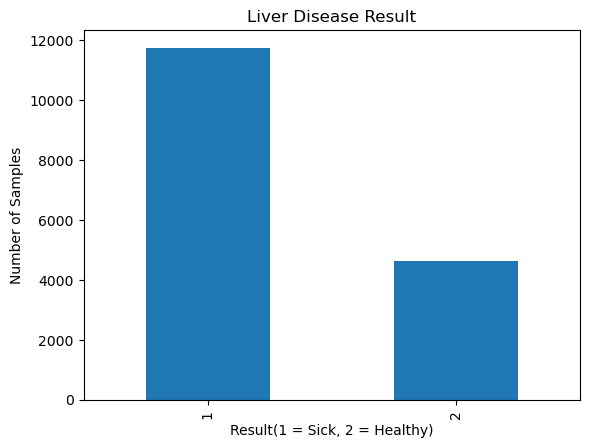

In [660]:
import matplotlib.pyplot as plt

# Count target classes
target_counts = y.value_counts()

# Plot
plt.figure()
target_counts.plot(kind='bar')
plt.title("Liver Disease Result")
plt.xlabel("Result(1 = Sick, 2 = Healthy)")
plt.ylabel("Number of Samples")
plt.show()

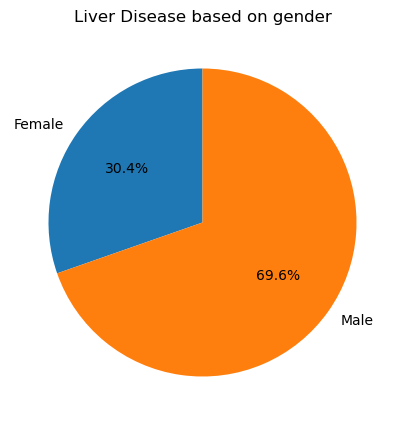

In [662]:
#Liver Disease based on gender
gender_counts = data["Gender of the patient"].value_counts().sort_index()

labels = ["Female", "Male"]   # 0 = Female, 1 = Male

plt.figure(figsize=(5,5))
plt.pie(
    gender_counts.values,
    labels=labels,
    autopct="%1.1f%%",
    startangle=90
)
plt.title("Liver Disease based on gender")
plt.show()


Text(0.5, 1.0, 'Total Bilirubin by Result')

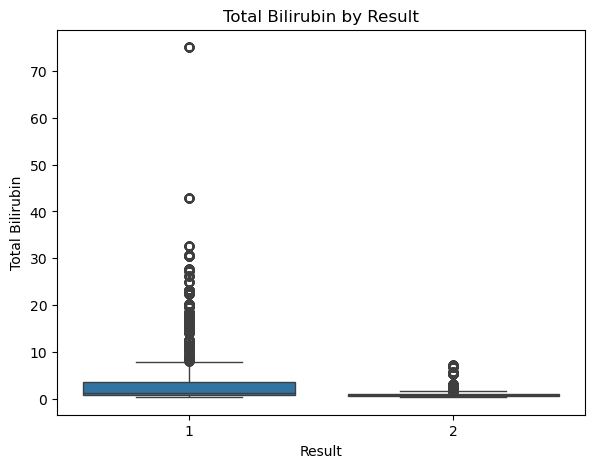

In [736]:
#Total biirubin by result
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
sns.boxplot(x="Result", y="Total Bilirubin", data=data)
plt.title("Total Bilirubin by Result")

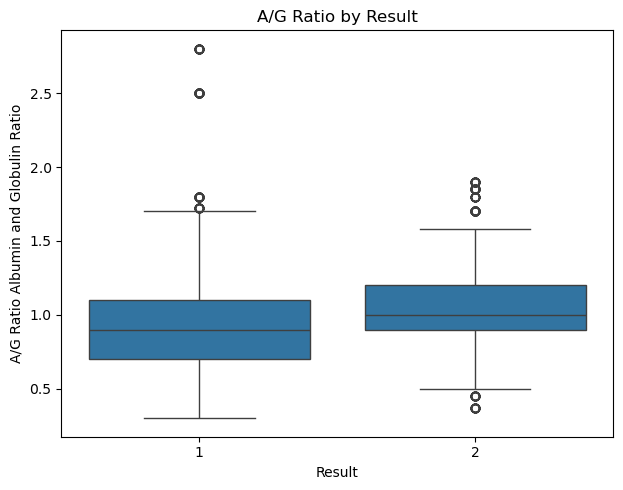

In [666]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,2)
sns.boxplot(x="Result", y="A/G Ratio Albumin and Globulin Ratio", data=data)
plt.title("A/G Ratio by Result")

plt.tight_layout()
plt.show()

Text(0.5, 0.98, 'Age Distribution by Liver Disease Result')

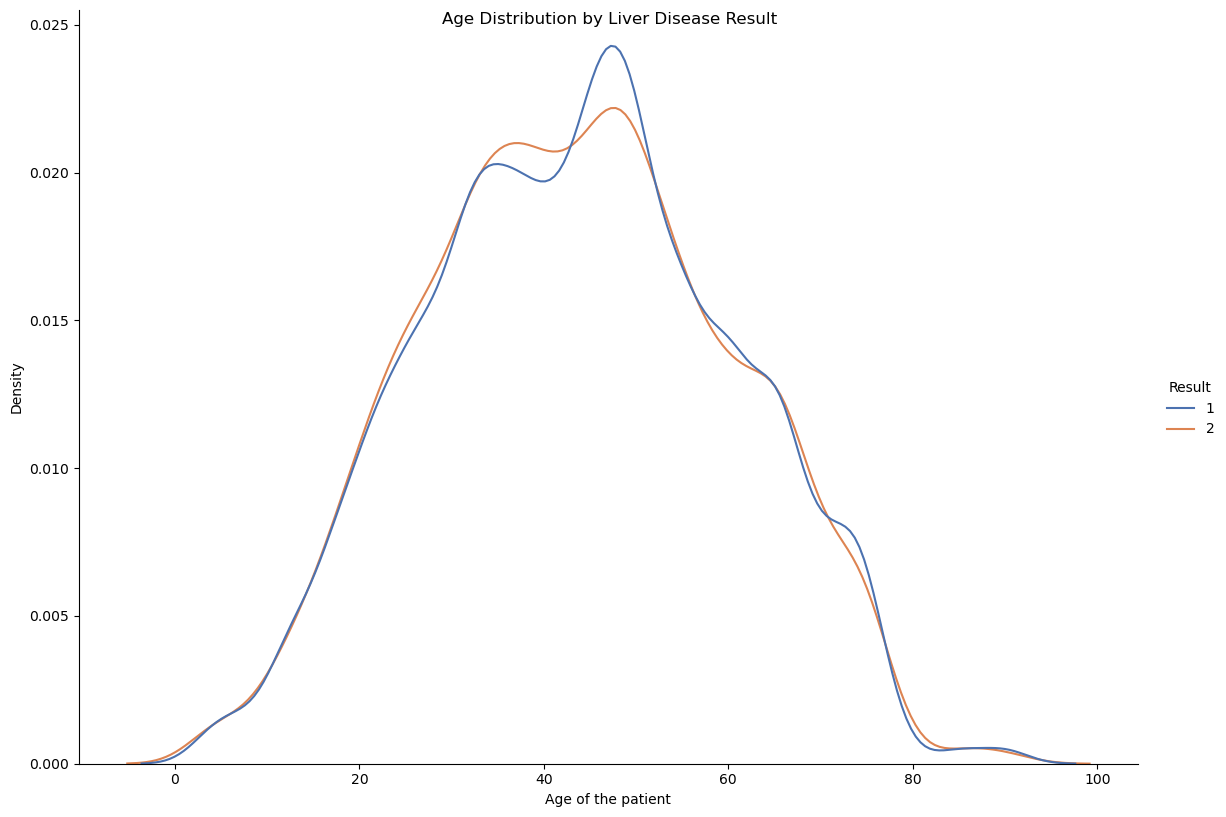

In [668]:
# KDE
ax = sns.displot(
    data=data,
    x="Age of the patient",
    kind="kde",
    hue="Result",
    common_norm=False,
    height=8.27,
    aspect=11.7/8.27,
    palette=["#4c72b0", "#dd8452"]
)
ax.set_axis_labels("Age of the patient", "Density")
ax.fig.suptitle("Age Distribution by Liver Disease Result")

<Axes: xlabel='\xa0Alkphos Alkaline Phosphotase', ylabel='Total Protiens'>

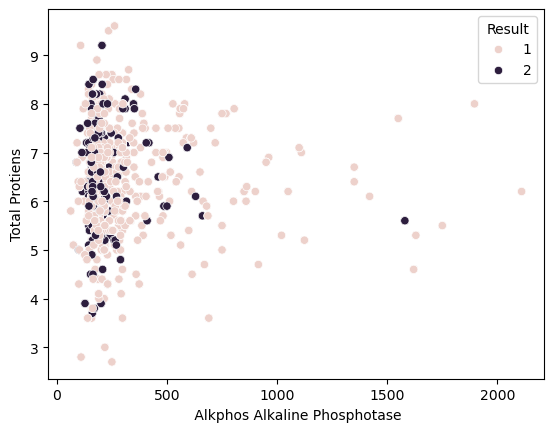

In [670]:
sns.scatterplot(x=data["\xa0Alkphos Alkaline Phosphotase"],y=data["Total Protiens"],hue=data["Result"])

In [672]:
data.describe()

,Age of the patient,Gender of the patient,Total Bilirubin,Direct Bilirubin,Alkphos Alkaline Phosphotase,Sgpt Alamine Aminotransferase,Sgot Aspartate Aminotransferase,Total Protiens,ALB Albumin,A/G Ratio Albumin and Globulin Ratio,Result
count,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000,16389.000000
mean,43.770517,0.696443,3.360431,1.530429,290.826835,80.147294,111.367564,6.487705,3.136573,0.946612,1.283056
std,16.529487,0.459808,6.208708,2.894558,240.945972,180.010180,280.665994,1.090549,0.794006,0.323337,0.450497
min,4.000000,0.000000,0.400000,0.100000,63.000000,10.000000,10.000000,2.700000,0.900000,0.300000,1.000000
25%,32.000000,0.000000,0.800000,0.200000,175.000000,23.000000,25.000000,5.800000,2.600000,0.700000,1.000000
50%,45.000000,1.000000,1.000000,0.300000,209.000000,35.000000,42.000000,6.600000,3.100000,0.930000,1.000000
75%,55.000000,1.000000,2.700000,1.300000,298.000000,62.000000,88.000000,7.200000,3.800000,1.100000,2.000000
max,90.000000,1.000000,75.000000,19.700000,2110.000000,2000.000000,4929.000000,9.600000,5.500000,2.800000,2.000000


In [674]:
from sklearn.model_selection import train_test_split

# Separate features and target
X = data.drop(columns=['Result'])   # shape: (16826, 10)
y = data['Result']                  # shape: (16826,)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Verify shapes
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)



X_train: (13111, 10)
X_test: (3278, 10)
y_train: (13111,)
y_test: (3278,)


In [676]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("X_train_scaled shape:", X_train_scaled.shape)
print("X_test_scaled shape:", X_test_scaled.shape)


X_train_scaled shape: (13111, 10)
X_test_scaled shape: (3278, 10)


In [678]:
# Initialize Logistic Regression model
lr_model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model
lr_model.fit(X_train_scaled, y_train)

# Make predictions on test set
y_pred_lr      = lr_model.predict(X_test_scaled)
y_pred_lr_prob = lr_model.predict_proba(X_test_scaled)[:, 1]

print(f"Predictions: {y_pred_lr[:10]}")

Predictions: [1 1 1 1 1 1 1 1 2 1]


In [680]:
# Initialize Decision Tree Classifier
dt_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=8,
    min_samples_split=10
)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_dt      = dt_model.predict(X_test)
y_pred_dt_proba = dt_model.predict_proba(X_test)[:, 1]

print(f"Predictions: {y_pred_dt[:10]}")


Predictions: [1 1 1 1 1 2 1 1 1 1]


In [682]:
# Initialize Random Forest Classifier
rf_model = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    max_depth=10,
    min_samples_split=5
)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on test set
y_pred_rf      = rf_model.predict(X_test)
y_pred_rf_proba = rf_model.predict_proba(X_test)[:, 1]

print(f"Predictions: {y_pred_rf[:10]}")


Predictions: [1 1 1 1 1 2 1 1 1 2]


In [684]:
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, roc_auc_score, classification_report)

# Performance Metrics - Logistic Regression
lr_accuracy  = accuracy_score(y_test, y_pred_lr)
lr_precision = precision_score(y_test, y_pred_lr, pos_label=1)
lr_recall    = recall_score(y_test, y_pred_lr, pos_label=1)
lr_f1        = f1_score(y_test, y_pred_lr, pos_label=1)
lr_roc_auc   = roc_auc_score(y_test, y_pred_lr_prob)

print("LOGISTIC REGRESSION - PERFORMANCE METRICS")
print(f"Accuracy : {lr_accuracy:.4f} ({lr_accuracy*100:.2f}%)")
print(f"Precision: {lr_precision:.4f} ({lr_precision*100:.2f}%)")
print(f"Recall   : {lr_recall:.4f} ({lr_recall*100:.2f}%)")
print(f"F1-Score : {lr_f1:.4f} ({lr_f1*100:.2f}%)")
print(f"ROC-AUC  : {lr_roc_auc:.4f} ({lr_roc_auc*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr, target_names=["Class 1", "Class 2"]))


LOGISTIC REGRESSION - PERFORMANCE METRICS
Accuracy : 0.7270 (72.70%)
Precision: 0.7403 (74.03%)
Recall   : 0.9536 (95.36%)
F1-Score : 0.8336 (83.36%)
ROC-AUC  : 0.7796 (77.96%)

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.74      0.95      0.83      2350
     Class 2       0.57      0.15      0.24       928

    accuracy                           0.73      3278
   macro avg       0.65      0.55      0.54      3278
weighted avg       0.69      0.73      0.67      3278



In [686]:
# Performance Metrics - Decision Tree
dt_accuracy  = accuracy_score(y_test, y_pred_dt)
dt_precision = precision_score(y_test, y_pred_dt, pos_label=1)
dt_recall    = recall_score(y_test, y_pred_dt, pos_label=1)
dt_f1        = f1_score(y_test, y_pred_dt, pos_label=1)
dt_roc_auc   = roc_auc_score(y_test, y_pred_dt_proba)

print("DECISION TREE - PERFORMANCE METRICS")
print(f"Accuracy : {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"Precision: {dt_precision:.4f} ({dt_precision*100:.2f}%)")
print(f"Recall   : {dt_recall:.4f} ({dt_recall*100:.2f}%)")
print(f"F1-Score : {dt_f1:.4f} ({dt_f1*100:.2f}%)")
print(f"ROC-AUC  : {dt_roc_auc:.4f} ({dt_roc_auc*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt, target_names=["Class 1", "Class 2"]))


DECISION TREE - PERFORMANCE METRICS
Accuracy : 0.8600 (86.00%)
Precision: 0.8644 (86.44%)
Recall   : 0.9545 (95.45%)
F1-Score : 0.9072 (90.72%)
ROC-AUC  : 0.9332 (93.32%)

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.86      0.95      0.91      2350
     Class 2       0.84      0.62      0.72       928

    accuracy                           0.86      3278
   macro avg       0.85      0.79      0.81      3278
weighted avg       0.86      0.86      0.85      3278



In [688]:
# Performance Metrics - Random Forest
rf_accuracy  = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, pos_label=1)
rf_recall    = recall_score(y_test, y_pred_rf, pos_label=1)
rf_f1        = f1_score(y_test, y_pred_rf, pos_label=1)
rf_roc_auc   = roc_auc_score(y_test, y_pred_rf_proba)

print("RANDOM FOREST - PERFORMANCE METRICS")
print(f"Accuracy : {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"Precision: {rf_precision:.4f} ({rf_precision*100:.2f}%)")
print(f"Recall   : {rf_recall:.4f} ({rf_recall*100:.2f}%)")
print(f"F1-Score : {rf_f1:.4f} ({rf_f1*100:.2f}%)")
print(f"ROC-AUC  : {rf_roc_auc:.4f} ({rf_roc_auc*100:.2f}%)")

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf, target_names=["Class 1", "Class 2"]))


RANDOM FOREST - PERFORMANCE METRICS
Accuracy : 0.9942 (99.42%)
Precision: 0.9932 (99.32%)
Recall   : 0.9987 (99.87%)
F1-Score : 0.9960 (99.60%)
ROC-AUC  : 0.9987 (99.87%)

Classification Report:
              precision    recall  f1-score   support

     Class 1       0.99      1.00      1.00      2350
     Class 2       1.00      0.98      0.99       928

    accuracy                           0.99      3278
   macro avg       0.99      0.99      0.99      3278
weighted avg       0.99      0.99      0.99      3278



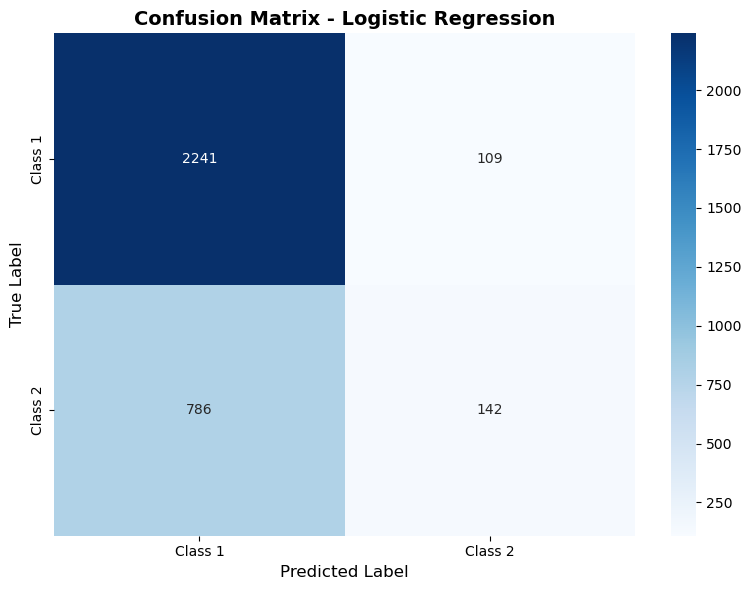

Logistic Regression Accuracy: 72.70%


In [690]:
from sklearn.metrics import confusion_matrix

# Logistic Regression Confusion Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_lr, annot=True, fmt='d', cmap='Blues',
    xticklabels=['Class 1', 'Class 2'],
    yticklabels=['Class 1', 'Class 2']
)
plt.title('Confusion Matrix - Logistic Regression', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Logistic Regression Accuracy: {lr_accuracy*100:.2f}%")


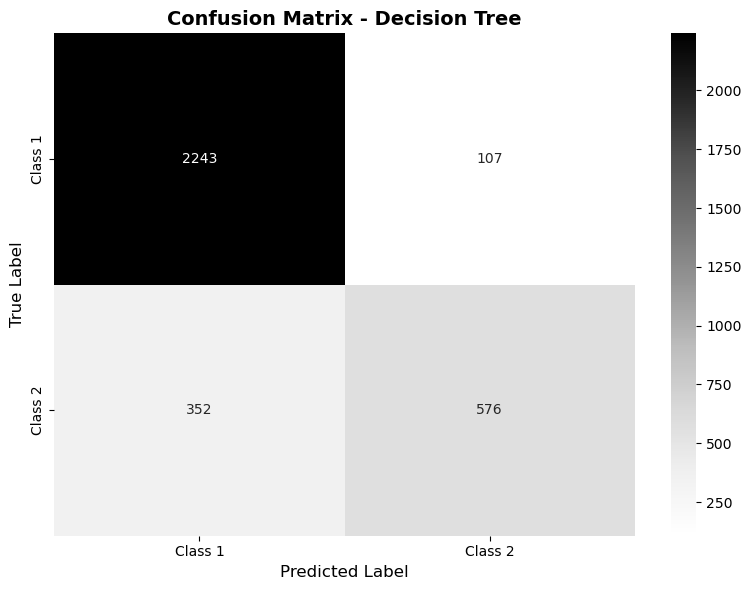

Decision Tree Accuracy: 86.00%


In [692]:
# Decision Tree Confusion Matrix
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_dt, annot=True, fmt='d', cmap='Greys',
    xticklabels=['Class 1', 'Class 2'],
    yticklabels=['Class 1', 'Class 2']
)
plt.title('Confusion Matrix - Decision Tree', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Decision Tree Accuracy: {dt_accuracy*100:.2f}%")


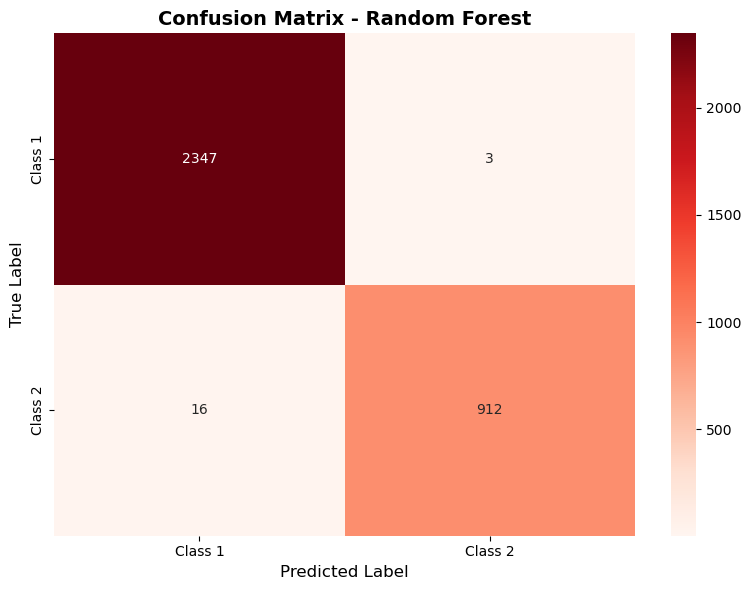

Random Forest Accuracy: 99.42%


In [694]:
# Random Forest Confusion Matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_rf, annot=True, fmt='d', cmap='Reds',
    xticklabels=['Class 1', 'Class 2'],
    yticklabels=['Class 1', 'Class 2']
)
plt.title('Confusion Matrix - Random Forest', fontsize=14, fontweight='bold')
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.tight_layout()
plt.show()

print(f"Random Forest Accuracy: {rf_accuracy*100:.2f}%")


In [696]:
print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))

Logistic Regression Accuracy: 0.726967663209274
Decision Tree Accuracy: 0.8599755948749237
Random Forest Accuracy: 0.9942037827943868


In [698]:
# Get feature importance from Decision Tree
feature_importance_dt = pd.DataFrame({
    "Feature": X.columns,
    "Importance": dt_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Decision Tree - Feature Importance:")
print(feature_importance_dt)

Decision Tree - Feature Importance:
                                Feature  Importance
4          Alkphos Alkaline Phosphotase    0.226712
2                       Total Bilirubin    0.216980
5         Sgpt Alamine Aminotransferase    0.162113
7                        Total Protiens    0.109641
9  A/G Ratio Albumin and Globulin Ratio    0.109373
6       Sgot Aspartate Aminotransferase    0.089451
3                      Direct Bilirubin    0.051499
8                           ALB Albumin    0.034232
0                    Age of the patient    0.000000
1                 Gender of the patient    0.000000


In [700]:
# Get feature importance from Random Forest
feature_importance_rf = pd.DataFrame({
    "Feature": X.columns,
    "Importance": rf_model.feature_importances_
}).sort_values(by="Importance", ascending=False)

print("Random Forest - Feature Importance:")
print(feature_importance_rf)

Random Forest - Feature Importance:
                                Feature  Importance
4          Alkphos Alkaline Phosphotase    0.178058
6       Sgot Aspartate Aminotransferase    0.148566
5         Sgpt Alamine Aminotransferase    0.144285
2                       Total Bilirubin    0.139005
3                      Direct Bilirubin    0.110955
7                        Total Protiens    0.096217
8                           ALB Albumin    0.093341
9  A/G Ratio Albumin and Globulin Ratio    0.088939
0                    Age of the patient    0.000600
1                 Gender of the patient    0.000034


In [702]:
# Create comparison DataFrame
comparison_df = pd.DataFrame({
    "Model":     ["Logistic Regression", "Random Forest", "Decision Tree"],
    "Accuracy":  [lr_accuracy,           rf_accuracy,     dt_accuracy],
    "Precision": [lr_precision,          rf_precision,    dt_precision],
    "Recall":    [lr_recall,             rf_recall,       dt_recall],
    "F1-Score":  [lr_f1,                 rf_f1,           dt_f1],
    "ROC-AUC":   [lr_roc_auc,            rf_roc_auc,      dt_roc_auc]
})

print("MODEL PERFORMANCE COMPARISON")
print(comparison_df.to_string(index=False))

# Identify best model based on ROC-AUC
best_model_idx  = comparison_df["ROC-AUC"].idxmax()
best_model_name = comparison_df.loc[best_model_idx, "Model"]
best_roc_auc    = comparison_df.loc[best_model_idx, "ROC-AUC"]

print(f"\nBest Performing Model: {best_model_name}")
print(f"Best ROC-AUC Score: {best_roc_auc:.4f} ({best_roc_auc*100:.2f}%)")


MODEL PERFORMANCE COMPARISON
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
Logistic Regression  0.726968   0.740337 0.953617  0.833550 0.779568
      Random Forest  0.994204   0.993229 0.998723  0.995969 0.998720
      Decision Tree  0.859976   0.864355 0.954468  0.907179 0.933154

Best Performing Model: Random Forest
Best ROC-AUC Score: 0.9987 (99.87%)


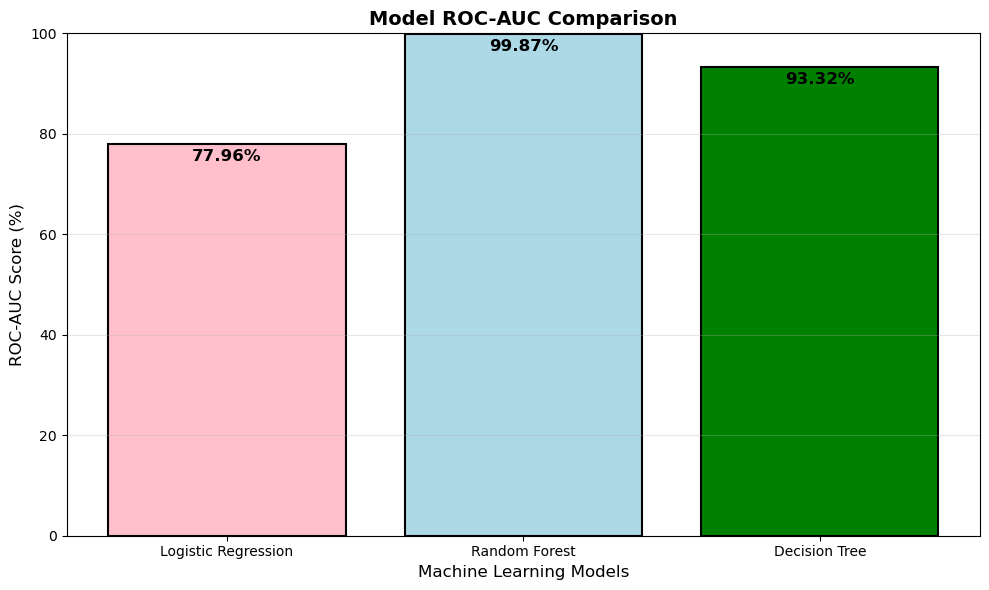

In [704]:
import matplotlib.pyplot as plt

# Assuming comparison_df contains the Model and ROC-AUC values
models = comparison_df["Model"].tolist()
roc_aucs = (comparison_df["ROC-AUC"] * 100).tolist()  # convert to percentage

plt.figure(figsize=(10, 6))

# Use more distinct colors for better visibility
colors = ["pink", "lightblue", "green"]

bars = plt.bar(
    models,
    roc_aucs,
    color=colors,
    edgecolor="black",
    linewidth=1.5
)

# Add value labels on top of each bar
for bar, auc in zip(bars, roc_aucs):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height - 4,
        f"{auc:.2f}%",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold",
        color="black"  
    )

plt.title("Model ROC-AUC Comparison", fontsize=14, fontweight="bold")
plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("ROC-AUC Score (%)", fontsize=12)
plt.ylim(0, 100)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


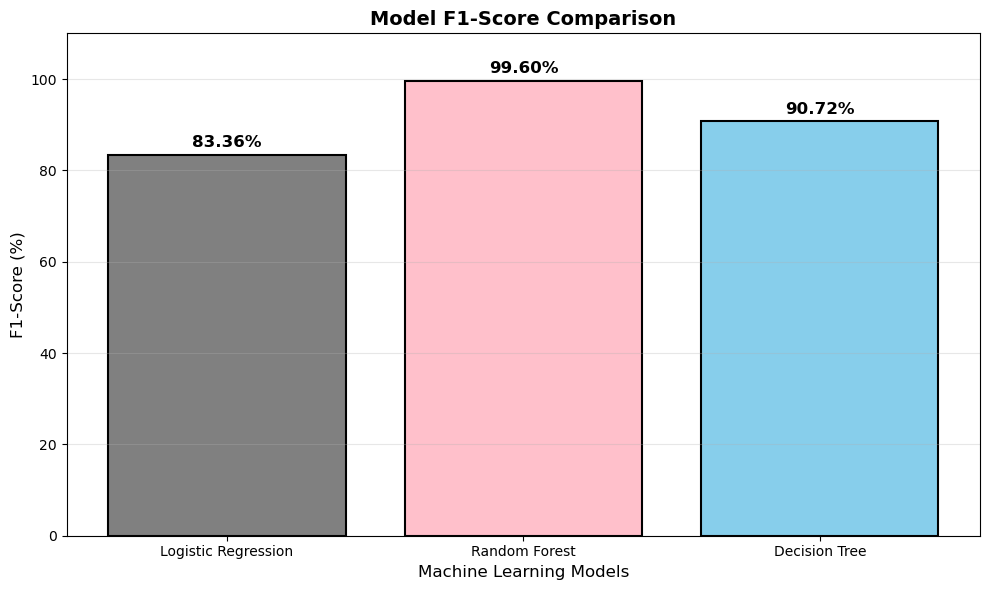

In [706]:
import matplotlib.pyplot as plt

# Visualize F1-Score comparison
plt.figure(figsize=(10, 6))

models    = comparison_df["Model"].tolist()
f1_scores = (comparison_df["F1-Score"] * 100).tolist()   # convert to %

bars = plt.bar(
    models,
    f1_scores,
    color=["grey", "pink", "SkyBlue"],
    edgecolor="black",
    linewidth=1.5
)

# Add value labels on bars
for bar, f1 in zip(bars, f1_scores):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{f1:.2f}%",
        ha="center",
        va="bottom",
        fontsize=12,
        fontweight="bold"
    )

plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("F1-Score (%)", fontsize=12)
plt.title("Model F1-Score Comparison", fontsize=14, fontweight="bold")
plt.ylim(0, 110)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


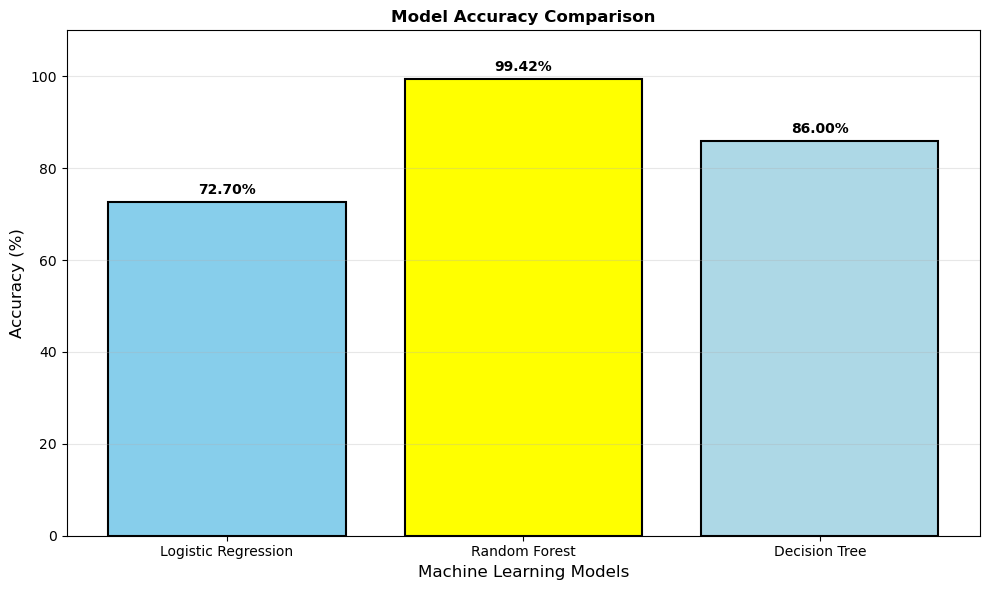

In [708]:
# Visualize accuracy comparison
plt.figure(figsize=(10, 6))

models     = comparison_df["Model"].tolist()
accuracies = (comparison_df["Accuracy"] * 100).tolist()   # convert to %

bars = plt.bar(
    models,
    accuracies,
    color=["skyblue", "yellow", "lightblue"],
    edgecolor="black",
    linewidth=1.5
)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 1,
        f"{acc:.2f}%",
        ha="center",
        va="bottom",
        fontsize=10,
        fontweight="bold"
    )

plt.xlabel("Machine Learning Models", fontsize=12)
plt.ylabel("Accuracy (%)", fontsize=12)
plt.title("Model Accuracy Comparison", fontsize=12, fontweight="bold")
plt.ylim(0, 110)
plt.grid(axis="y", alpha=0.3)
plt.tight_layout()
plt.show()


MODEL ERROR METRICS COMPARISON
              Model    MAE   RMSE  Accuracy
Logistic Regression 0.2730 0.5225    0.7270
      Random Forest 0.0058 0.0761    0.9942
      Decision Tree 0.1400 0.3742    0.8600


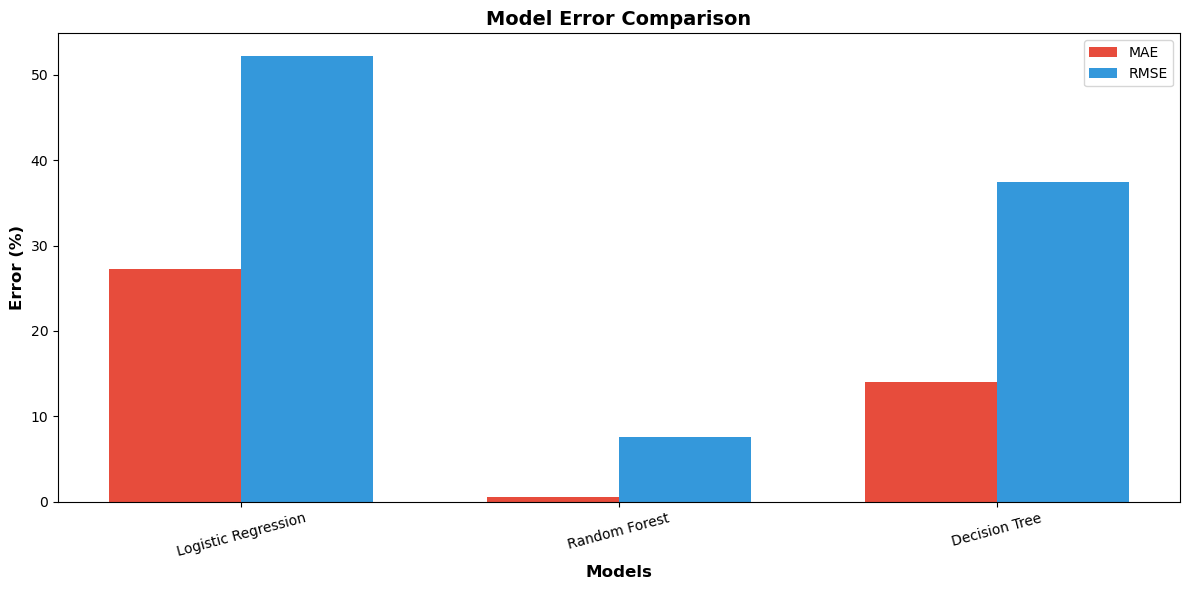

In [710]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Calculate error metrics for all models
lr_mae  = mean_absolute_error(y_test, y_pred_lr)
lr_rmse = np.sqrt(mean_squared_error(y_test, y_pred_lr))

rf_mae  = mean_absolute_error(y_test, y_pred_rf)
rf_rmse = np.sqrt(mean_squared_error(y_test, y_pred_rf))

dt_mae  = mean_absolute_error(y_test, y_pred_dt)
dt_rmse = np.sqrt(mean_squared_error(y_test, y_pred_dt))

# Create comparison DataFrame
error_df = pd.DataFrame({
    "Model":           ["Logistic Regression", "Random Forest", "Decision Tree"],
    "MAE":             [lr_mae, rf_mae, dt_mae],
    "RMSE":            [lr_rmse, rf_rmse, dt_rmse],
    "Accuracy":        [lr_accuracy, rf_accuracy, dt_accuracy]
})

print("MODEL ERROR METRICS COMPARISON")
print(error_df.round(4).to_string(index=False))

# Visualize error comparison
plt.figure(figsize=(12, 6))

models = error_df["Model"]
maes   = error_df["MAE"] * 100
rmses  = error_df["RMSE"] * 100

x = np.arange(len(models))
width = 0.35

plt.bar(x - width/2, maes, width, label="MAE", color="#e74c3c")
plt.bar(x + width/2, rmses, width, label="RMSE", color="#3498db")

plt.xlabel("Models", fontsize=12, fontweight="bold")
plt.ylabel("Error (%)", fontsize=12, fontweight="bold")
plt.title("Model Error Comparison", fontsize=14, fontweight="bold")
plt.xticks(x, models, rotation=15)
plt.legend()
plt.tight_layout()
plt.show()


In [718]:
# Liver Disease Predection
def predict(age, gender, tb, db, alk, sgpt, sgot, tp, alb, agr):
    data = np.array([[age, gender, tb, db, alk, sgpt, sgot, tp, alb, agr]])
    scaled = scaler.transform(data)
    pred = rf_model.predict(scaled)[0]
    prob = rf_model.predict_proba(scaled)[0, 1]
    
    print(f"RESULT: {'DISEASE' if pred==1 else 'NORMAL'} ({prob:.1%})")

# Data passing for predection
predict(55, 1, 1.2, 0.3, 210, 30, 35, 6.5, 3.2, 0.9)


RESULT: NORMAL (53.3%)


In [728]:
print("Thank You")

Thank You
